In [1]:
import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow.keras import layers

import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

tf.config.experimental.enable_op_determinism()
tf.__version__

2023-09-19 21:27:14.938722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 21:27:15.371688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.13.0'

In [2]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
shap.initjs()

In [4]:
subject = 'Paraná - Consumo de Cimento (t)'
split_index = 12 #Referente aos 13 anos de input  

In [5]:
data = pd.read_csv('../../Inputs Atuais/2008_01_model_input_PR.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data = data.drop('Paraná - Produção de Cimento (t)', axis=1)
data

,Ano,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,...,NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Paraná - Consumo de Cimento (t)
0,2008,8.033948,0.782138,0.768548,7.755114e+06,422290.202070,9.424555,6.724366e+06,0.745648,0.834122,...,2.868108,11.760983,17.558665,912.624708,1226.296848,18.012164,13.653739,78.027482,2.236583,3001.521000
1,2009,8.063370,0.782910,0.767137,7.805166e+06,424173.603186,9.409042,6.722105e+06,0.748601,0.835310,...,2.305885,9.472585,16.652522,912.466179,1217.653383,17.954863,13.668549,78.238643,2.155189,3092.068000
2,2010,8.026843,0.783594,0.766111,7.991788e+06,416829.675918,9.394384,6.762279e+06,0.751387,0.835940,...,1.958246,9.332485,17.928528,912.482023,1194.060192,17.703414,13.001948,76.311573,2.092804,3749.448000
3,2011,8.013806,0.784190,0.765458,8.164220e+06,410997.875281,9.386906,6.795421e+06,0.753998,0.836020,...,2.079088,10.985689,18.661309,912.629463,1182.416452,17.710041,12.630186,74.615878,2.043995,4174.942000
4,2012,6.472496,0.784389,0.764921,8.325627e+06,407346.950074,9.383420,6.827686e+06,0.755977,0.835445,...,2.183282,8.159014,19.310061,912.778766,1176.491125,17.874291,12.612094,73.865245,1.941425,4522.969000
5,2013,7.011799,0.785421,0.765581,8.462722e+06,403688.428174,9.371494,6.849508e+06,0.759142,0.834565,...,2.403445,7.913561,19.233593,912.914618,1170.878793,18.105264,12.720105,73.487865,1.844730,4578.716000
6,2014,7.462443,0.785706,0.765963,8.560896e+06,400704.121188,9.343267,6.852462e+06,0.760987,0.833112,...,2.748397,10.350442,20.725057,912.973266,1150.562966,18.275455,13.157699,74.605015,1.851460,4341.821857
7,2015,7.813261,0.785515,0.766043,8.597116e+06,391942.316578,9.284504,6.825760e+06,0.762152,0.831122,...,2.501529,12.454398,22.054778,913.057535,1145.712487,18.177724,13.346348,75.170150,1.905966,4108.786286
8,2016,7.840669,0.788366,0.758774,8.620855e+06,389049.090551,9.247193,6.809907e+06,0.771114,0.838386,...,2.073464,13.111908,22.315526,913.132268,1158.573328,18.115048,13.261122,74.043778,1.933375,3869.334857
9,2017,7.553100,0.787582,0.759026,8.632052e+06,389052.079088,9.235469,6.808242e+06,0.770943,0.835784,...,2.177386,9.479812,21.977949,913.165670,1160.957791,18.281050,13.470416,73.546507,1.889856,3764.518000


In [6]:
input_data = data.iloc[:-2, 1:-1]
input_data

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,8.033948,0.782138,0.768548,7.755114e+06,422290.202070,9.424555,6.724366e+06,0.745648,0.834122,5.483335e+08,...,-7723.574973,2.868108,11.760983,17.558665,912.624708,1226.296848,18.012164,13.653739,78.027482,2.236583
1,8.063370,0.782910,0.767137,7.805166e+06,424173.603186,9.409042,6.722105e+06,0.748601,0.835310,5.302764e+08,...,-8961.781709,2.305885,9.472585,16.652522,912.466179,1217.653383,17.954863,13.668549,78.238643,2.155189
2,8.026843,0.783594,0.766111,7.991788e+06,416829.675918,9.394384,6.762279e+06,0.751387,0.835940,5.046425e+08,...,-9895.682385,1.958246,9.332485,17.928528,912.482023,1194.060192,17.703414,13.001948,76.311573,2.092804
3,8.013806,0.784190,0.765458,8.164220e+06,410997.875281,9.386906,6.795421e+06,0.753998,0.836020,4.854622e+08,...,-9989.170714,2.079088,10.985689,18.661309,912.629463,1182.416452,17.710041,12.630186,74.615878,2.043995
4,6.472496,0.784389,0.764921,8.325627e+06,407346.950074,9.383420,6.827686e+06,0.755977,0.835445,4.867661e+08,...,-9429.326328,2.183282,8.159014,19.310061,912.778766,1176.491125,17.874291,12.612094,73.865245,1.941425
5,7.011799,0.785421,0.765581,8.462722e+06,403688.428174,9.371494,6.849508e+06,0.759142,0.834565,5.225848e+08,...,-7157.441850,2.403445,7.913561,19.233593,912.914618,1170.878793,18.105264,12.720105,73.487865,1.844730
6,7.462443,0.785706,0.765963,8.560896e+06,400704.121188,9.343267,6.852462e+06,0.760987,0.833112,5.676413e+08,...,-3453.461327,2.748397,10.350442,20.725057,912.973266,1150.562966,18.275455,13.157699,74.605015,1.851460
7,7.813261,0.785515,0.766043,8.597116e+06,391942.316578,9.284504,6.825760e+06,0.762152,0.831122,5.179392e+08,...,-1442.919387,2.501529,12.454398,22.054778,913.057535,1145.712487,18.177724,13.346348,75.170150,1.905966
8,7.840669,0.788366,0.758774,8.620855e+06,389049.090551,9.247193,6.809907e+06,0.771114,0.838386,4.524144e+08,...,-3128.377228,2.073464,13.111908,22.315526,913.132268,1158.573328,18.115048,13.261122,74.043778,1.933375
9,7.553100,0.787582,0.759026,8.632052e+06,389052.079088,9.235469,6.808242e+06,0.770943,0.835784,4.213689e+08,...,-5386.337108,2.177386,9.479812,21.977949,913.165670,1160.957791,18.281050,13.470416,73.546507,1.889856


In [7]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-1)
target_data

0     3092.068000
1     3749.448000
2     4174.942000
3     4522.969000
4     4578.716000
5     4341.821857
6     4108.786286
7     3869.334857
8     3764.518000
9     3773.354000
10    3786.974000
11    4235.532000
12    4784.413000
13    4538.256000
14            NaN
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [8]:
# input para treinamento
train_input = (input_data.iloc[:-1] - np.mean(input_data.iloc[:-1], axis=0)) / np.std(input_data.iloc[:-1], axis=0)
train_input 

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,0.954430,-1.699678,1.331277,-1.852442,1.525597,1.304983,-1.799100,-1.621982,-0.042462,1.204752,...,-0.569731,2.026352,0.984445,-1.266771,-0.975425,1.940409,-0.268956,1.137644,1.835993,2.079287
1,1.017927,-1.261317,0.939993,-1.694326,1.677576,1.094681,-1.854414,-1.293295,0.429908,0.820657,...,-0.838980,0.085558,-0.051710,-1.745665,-1.582298,1.579454,-0.539264,1.176616,1.956737,1.461930
2,0.939098,-0.873574,0.655199,-1.104775,1.084964,0.895963,-0.871808,-0.983091,0.680031,0.275392,...,-1.042057,-1.114490,-0.115145,-1.071300,-1.521642,0.594192,-1.725446,-0.577589,0.854816,0.988761
3,0.910963,-0.535386,0.474312,-0.560051,0.614372,0.794584,-0.061186,-0.692424,0.712066,-0.132596,...,-1.062386,-0.697344,0.633403,-0.684027,-0.957222,0.107944,-1.694185,-1.555909,-0.114802,0.618558
4,-2.415320,-0.422527,0.325283,-0.050154,0.319763,0.747334,0.727969,-0.472052,0.483303,-0.104860,...,-0.940648,-0.337667,-0.646476,-0.341164,-0.385670,-0.139500,-0.919352,-1.603519,-0.544022,-0.159410
5,-1.251457,0.163252,0.508405,0.382937,0.024542,0.585657,1.261692,-0.119710,0.133711,0.657046,...,-0.446625,0.422337,-0.757614,-0.381577,0.134391,-0.373874,0.170234,-1.319280,-0.759813,-0.892823
6,-0.278927,0.325010,0.614316,0.693077,-0.216274,0.203003,1.333947,0.085716,-0.443735,1.615453,...,0.358807,1.613108,0.345772,0.406656,0.358905,-1.222272,0.973093,-0.167721,-0.121014,-0.841773
7,0.478169,0.216545,0.636582,0.807496,-0.923301,-0.593627,0.680859,0.215483,-1.234902,0.558230,...,0.796000,0.760923,1.298413,1.109410,0.681498,-1.424830,0.512055,0.328724,0.202137,-0.428361
8,0.537319,1.834498,-1.380170,0.882491,-1.156767,-1.099436,0.293116,1.213246,1.652199,-0.835563,...,0.429496,-0.716758,1.596124,1.247214,0.967586,-0.887756,0.216390,0.104443,-0.441935,-0.220470
9,-0.083280,1.389158,-1.310222,0.917863,-1.156526,-1.258364,0.252392,1.194161,0.618336,-1.495939,...,-0.061498,-0.358019,-0.048438,1.068806,1.095455,-0.788179,0.999483,0.655217,-0.726280,-0.550555


In [9]:
# Alvo para treinamento
train_target = target_data.iloc[:split_index]
train_target

0     3092.068000
1     3749.448000
2     4174.942000
3     4522.969000
4     4578.716000
5     4341.821857
6     4108.786286
7     3869.334857
8     3764.518000
9     3773.354000
10    3786.974000
11    4235.532000
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [10]:
#input de test (Ano 2021)
test_input = ((input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)).iloc[-1:]
test_input

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
12,-0.734266,-1.069894,-1.42466,0.401023,-0.568106,-1.099064,-0.414155,1.035451,-2.637193,1.108405,...,0.964765,-1.482779,-2.260447,0.964616,0.339314,-0.540552,0.224215,0.839814,-2.237536,-1.155068


In [11]:
# Alvo de test (Ano 2021)
test_target = target_data.iloc[split_index:-2]
test_target

12    4784.413
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [12]:
# Rede neural feed-forward com optmizador Estocástico
def neural_network_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2048, activation='tanh', input_shape=(train_input.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train_input, 
                      train_target, 
                      epochs=10000,
                      validation_data=(train_input.iloc[-1:], train_target.iloc[-1:]),
                      callbacks=[early_stopping], 
                      verbose=want_verbose)
    return model, history

In [13]:
trained_model, history = neural_network_model(train_input, train_target, want_verbose=1, seed=311622981)

Epoch 1/10000


2023-09-19 21:27:22.593998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 21:27:22.696823: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 400ms/step - loss: 16154771.0000 - val_loss: 18048026.0000
Epoch 2/10000
1/1 [==============================] - 0s 22ms/step - loss: 15696269.0000 - val_loss: 9487796.0000
Epoch 3/10000
1/1 [==============================] - 0s 22ms/step - loss: 16665516.0000 - val_loss: 16141701.0000
Epoch 4/10000
1/1 [==============================] - 0s 22ms/step - loss: 15416597.0000 - val_loss: 17258442.0000
Epoch 5/10000
1/1 [==============================] - 0s 23ms/step - loss: 15046717.0000 - val_loss: 15375420.0000
Epoch 6/10000
1/1 [==============================] - 0s 23ms/step - loss: 14173259.0000 - val_loss: 18596882.0000
Epoch 7/10000
1/1 [==============================] - 0s 20ms/step - loss: 14768476.0000 - val_loss: 13659192.0000
Epoch 8/10000
1/1 [==============================] - 0s 21ms/step - loss: 13466048.0000 - val_loss: 12564292.0000
Epoch 9/10000
1/1 [==============================] - 0s 22ms/step - loss: 14162816.0000 - val_loss: 16

1/1 [==============================] - 0s 20ms/step - loss: 3876416.7500 - val_loss: 5336668.5000
Epoch 74/10000
1/1 [==============================] - 0s 20ms/step - loss: 3909807.7500 - val_loss: 4894249.0000
Epoch 75/10000
1/1 [==============================] - 0s 19ms/step - loss: 3751080.0000 - val_loss: 4818692.5000
Epoch 76/10000
1/1 [==============================] - 0s 19ms/step - loss: 3752542.0000 - val_loss: 4619712.0000
Epoch 77/10000
1/1 [==============================] - 0s 22ms/step - loss: 3522689.0000 - val_loss: 4703622.5000
Epoch 78/10000
1/1 [==============================] - 0s 20ms/step - loss: 3538674.2500 - val_loss: 4494484.0000
Epoch 79/10000
1/1 [==============================] - 0s 20ms/step - loss: 3201549.0000 - val_loss: 4421928.0000
Epoch 80/10000
1/1 [==============================] - 0s 20ms/step - loss: 3382387.7500 - val_loss: 4790929.0000
Epoch 81/10000
1/1 [==============================] - 0s 20ms/step - loss: 3418048.2500 - val_loss: 4204557.500

1/1 [==============================] - 0s 21ms/step - loss: 1064989.6250 - val_loss: 1550456.0000
Epoch 146/10000
1/1 [==============================] - 0s 22ms/step - loss: 1000083.6875 - val_loss: 1544652.7500
Epoch 147/10000
1/1 [==============================] - 0s 21ms/step - loss: 977684.1875 - val_loss: 1530342.3750
Epoch 148/10000
1/1 [==============================] - 0s 21ms/step - loss: 1017660.7500 - val_loss: 1495940.3750
Epoch 149/10000
1/1 [==============================] - 0s 21ms/step - loss: 939132.8125 - val_loss: 1529636.3750
Epoch 150/10000
1/1 [==============================] - 0s 21ms/step - loss: 948154.3125 - val_loss: 1470326.1250
Epoch 151/10000
1/1 [==============================] - 0s 20ms/step - loss: 925959.3125 - val_loss: 1378909.5000
Epoch 152/10000
1/1 [==============================] - 0s 22ms/step - loss: 894793.6875 - val_loss: 1410622.5000
Epoch 153/10000
1/1 [==============================] - 0s 21ms/step - loss: 910061.8125 - val_loss: 1399963.8

Epoch 218/10000
1/1 [==============================] - 0s 23ms/step - loss: 347771.1875 - val_loss: 630909.0625
Epoch 219/10000
1/1 [==============================] - 0s 21ms/step - loss: 365059.0000 - val_loss: 605691.3125
Epoch 220/10000
1/1 [==============================] - 0s 20ms/step - loss: 351281.5938 - val_loss: 515048.0000
Epoch 221/10000
1/1 [==============================] - 0s 22ms/step - loss: 353590.7500 - val_loss: 602819.5625
Epoch 222/10000
1/1 [==============================] - 0s 23ms/step - loss: 348348.4688 - val_loss: 613692.8125
Epoch 223/10000
1/1 [==============================] - 0s 21ms/step - loss: 347498.6562 - val_loss: 587657.0000
Epoch 224/10000
1/1 [==============================] - 0s 20ms/step - loss: 325933.2500 - val_loss: 568815.0000
Epoch 225/10000
1/1 [==============================] - 0s 20ms/step - loss: 319489.0312 - val_loss: 539639.8125
Epoch 226/10000
1/1 [==============================] - 0s 22ms/step - loss: 300227.4688 - val_loss: 5164

1/1 [==============================] - 0s 27ms/step - loss: 204180.6250 - val_loss: 289589.0312
Epoch 292/10000
1/1 [==============================] - 0s 24ms/step - loss: 190844.1719 - val_loss: 295736.0312
Epoch 293/10000
1/1 [==============================] - 0s 23ms/step - loss: 200255.2969 - val_loss: 275887.5625
Epoch 294/10000
1/1 [==============================] - 0s 21ms/step - loss: 186098.9531 - val_loss: 293008.1250
Epoch 295/10000
1/1 [==============================] - 0s 25ms/step - loss: 197687.9531 - val_loss: 269689.5312
Epoch 296/10000
1/1 [==============================] - 0s 23ms/step - loss: 205799.1719 - val_loss: 260565.8750
Epoch 297/10000
1/1 [==============================] - 0s 21ms/step - loss: 182031.0781 - val_loss: 251977.2812
Epoch 298/10000
1/1 [==============================] - 0s 23ms/step - loss: 195427.2656 - val_loss: 280726.3750
Epoch 299/10000
1/1 [==============================] - 0s 24ms/step - loss: 198233.3125 - val_loss: 275250.5938
Epoch 30

1/1 [==============================] - 0s 21ms/step - loss: 166744.7500 - val_loss: 166949.2500
Epoch 365/10000
1/1 [==============================] - 0s 20ms/step - loss: 161439.0312 - val_loss: 166883.4219
Epoch 366/10000
1/1 [==============================] - 0s 19ms/step - loss: 164751.1250 - val_loss: 166612.8438
Epoch 367/10000
1/1 [==============================] - 0s 19ms/step - loss: 149690.6406 - val_loss: 167699.6406
Epoch 368/10000
1/1 [==============================] - 0s 22ms/step - loss: 171426.7344 - val_loss: 171314.9531
Epoch 369/10000
1/1 [==============================] - 0s 22ms/step - loss: 157975.7656 - val_loss: 176349.1406
Epoch 370/10000
1/1 [==============================] - 0s 20ms/step - loss: 158269.1562 - val_loss: 174684.0000
Epoch 371/10000
1/1 [==============================] - 0s 25ms/step - loss: 157345.3125 - val_loss: 163361.4219
Epoch 372/10000
1/1 [==============================] - 0s 23ms/step - loss: 148151.9219 - val_loss: 147082.1719
Epoch 37

1/1 [==============================] - 0s 24ms/step - loss: 157622.2188 - val_loss: 130516.9062
Epoch 438/10000
1/1 [==============================] - 0s 25ms/step - loss: 149762.0938 - val_loss: 142880.3125
Epoch 439/10000
1/1 [==============================] - 0s 21ms/step - loss: 159236.3281 - val_loss: 131021.2031
Epoch 440/10000
1/1 [==============================] - 0s 20ms/step - loss: 150986.3750 - val_loss: 130979.4922
Epoch 441/10000
1/1 [==============================] - 0s 22ms/step - loss: 151017.5781 - val_loss: 124524.3828
Epoch 442/10000
1/1 [==============================] - 0s 24ms/step - loss: 153697.1875 - val_loss: 132712.2188
Epoch 443/10000
1/1 [==============================] - 0s 23ms/step - loss: 151971.4219 - val_loss: 124985.0391
Epoch 444/10000
1/1 [==============================] - 0s 20ms/step - loss: 153743.3594 - val_loss: 129045.1250
Epoch 445/10000
1/1 [==============================] - 0s 21ms/step - loss: 154738.7031 - val_loss: 131220.2812
Epoch 44

1/1 [==============================] - 0s 21ms/step - loss: 151199.0781 - val_loss: 113664.2969
Epoch 511/10000
1/1 [==============================] - 0s 20ms/step - loss: 149628.2969 - val_loss: 118031.5000
Epoch 512/10000
1/1 [==============================] - 0s 22ms/step - loss: 149812.5781 - val_loss: 106029.4141
Epoch 513/10000
1/1 [==============================] - 0s 20ms/step - loss: 148585.4375 - val_loss: 120588.1562
Epoch 514/10000
1/1 [==============================] - 0s 20ms/step - loss: 152855.0156 - val_loss: 105685.4688
Epoch 515/10000
1/1 [==============================] - 0s 20ms/step - loss: 157118.6719 - val_loss: 111730.7344
Epoch 516/10000
1/1 [==============================] - 0s 23ms/step - loss: 143334.7812 - val_loss: 91446.2891
Epoch 517/10000
1/1 [==============================] - 0s 21ms/step - loss: 153192.3281 - val_loss: 119220.4922
Epoch 518/10000
1/1 [==============================] - 0s 21ms/step - loss: 158024.2656 - val_loss: 113020.0625
Epoch 519

1/1 [==============================] - 0s 19ms/step - loss: 144382.5000 - val_loss: 97372.1875
Epoch 584/10000
1/1 [==============================] - 0s 19ms/step - loss: 147775.9219 - val_loss: 111078.1797
Epoch 585/10000
1/1 [==============================] - 0s 19ms/step - loss: 151799.7656 - val_loss: 106189.4219
Epoch 586/10000
1/1 [==============================] - 0s 21ms/step - loss: 150996.9531 - val_loss: 108670.5078
Epoch 587/10000
1/1 [==============================] - 0s 22ms/step - loss: 148850.4219 - val_loss: 110558.1953
Epoch 588/10000
1/1 [==============================] - 0s 20ms/step - loss: 151833.8438 - val_loss: 105677.2188
Epoch 589/10000
1/1 [==============================] - 0s 20ms/step - loss: 146697.3125 - val_loss: 111523.2188
Epoch 590/10000
1/1 [==============================] - 0s 25ms/step - loss: 150157.3906 - val_loss: 104363.0703
Epoch 591/10000
1/1 [==============================] - 0s 24ms/step - loss: 146968.6094 - val_loss: 115567.6328
Epoch 592

1/1 [==============================] - 0s 20ms/step - loss: 150574.9062 - val_loss: 104497.0312
Epoch 657/10000
1/1 [==============================] - 0s 19ms/step - loss: 156133.2656 - val_loss: 102788.3359
Epoch 658/10000
1/1 [==============================] - 0s 20ms/step - loss: 150001.7500 - val_loss: 102602.9141
Epoch 659/10000
1/1 [==============================] - 0s 20ms/step - loss: 149011.2969 - val_loss: 113645.6953
Epoch 660/10000
1/1 [==============================] - 0s 19ms/step - loss: 151573.3906 - val_loss: 101398.8672
Epoch 661/10000
1/1 [==============================] - 0s 18ms/step - loss: 150151.8438 - val_loss: 98501.7344
Epoch 662/10000
1/1 [==============================] - 0s 19ms/step - loss: 150160.8281 - val_loss: 100309.3750
Epoch 663/10000
1/1 [==============================] - 0s 20ms/step - loss: 150019.9219 - val_loss: 95516.0078
Epoch 664/10000
1/1 [==============================] - 0s 24ms/step - loss: 153190.3125 - val_loss: 101631.4453
Epoch 665/

1/1 [==============================] - 0s 23ms/step - loss: 151517.4531 - val_loss: 98611.4844
Epoch 730/10000
1/1 [==============================] - 0s 20ms/step - loss: 151176.4219 - val_loss: 94832.7188
Epoch 731/10000
1/1 [==============================] - 0s 21ms/step - loss: 149524.6406 - val_loss: 91675.1562
Epoch 732/10000
1/1 [==============================] - 0s 23ms/step - loss: 152989.4375 - val_loss: 95581.5156
Epoch 733/10000
1/1 [==============================] - 0s 20ms/step - loss: 156667.6875 - val_loss: 105574.2266
Epoch 734/10000
1/1 [==============================] - 0s 18ms/step - loss: 146951.3281 - val_loss: 89733.8906
Epoch 735/10000
1/1 [==============================] - 0s 19ms/step - loss: 153440.6875 - val_loss: 98100.9375
Epoch 736/10000
1/1 [==============================] - 0s 20ms/step - loss: 148775.4688 - val_loss: 91827.1953
Epoch 737/10000
1/1 [==============================] - 0s 19ms/step - loss: 143939.3438 - val_loss: 101942.8516
Epoch 738/10000

Epoch 803/10000
1/1 [==============================] - 0s 21ms/step - loss: 148416.5000 - val_loss: 91123.6484
Epoch 804/10000
1/1 [==============================] - 0s 19ms/step - loss: 147267.4844 - val_loss: 90020.0703
Epoch 805/10000
1/1 [==============================] - 0s 20ms/step - loss: 150059.2500 - val_loss: 91401.8516
Epoch 806/10000
1/1 [==============================] - 0s 20ms/step - loss: 147787.8281 - val_loss: 100754.0156
Epoch 807/10000
1/1 [==============================] - 0s 20ms/step - loss: 151301.8281 - val_loss: 96488.0391
Epoch 808/10000
1/1 [==============================] - 0s 19ms/step - loss: 150229.2031 - val_loss: 87426.1875
Epoch 809/10000
1/1 [==============================] - 0s 19ms/step - loss: 152198.2344 - val_loss: 96532.6406
Epoch 810/10000
1/1 [==============================] - 0s 19ms/step - loss: 147977.2656 - val_loss: 93614.3359
Epoch 811/10000
1/1 [==============================] - 0s 24ms/step - loss: 155833.6250 - val_loss: 95885.9375


Epoch 877/10000
1/1 [==============================] - 0s 19ms/step - loss: 146330.6719 - val_loss: 79669.1953
Epoch 878/10000
1/1 [==============================] - 0s 22ms/step - loss: 145999.4375 - val_loss: 78834.5469
Epoch 879/10000
1/1 [==============================] - 0s 23ms/step - loss: 143955.4531 - val_loss: 80031.6641
Epoch 880/10000
1/1 [==============================] - 0s 19ms/step - loss: 151261.3281 - val_loss: 76647.7344
Epoch 881/10000
1/1 [==============================] - 0s 23ms/step - loss: 168081.2344 - val_loss: 79191.9531
Epoch 882/10000
1/1 [==============================] - 0s 23ms/step - loss: 152617.8906 - val_loss: 86224.3828
Epoch 883/10000
1/1 [==============================] - 0s 24ms/step - loss: 145028.7656 - val_loss: 69170.6719
Epoch 884/10000
1/1 [==============================] - 0s 26ms/step - loss: 144979.0312 - val_loss: 90320.2031
Epoch 885/10000
1/1 [==============================] - 0s 20ms/step - loss: 147060.4531 - val_loss: 67846.5156
E

Epoch 951/10000
1/1 [==============================] - 0s 22ms/step - loss: 155807.3750 - val_loss: 84726.6172
Epoch 952/10000
1/1 [==============================] - 0s 20ms/step - loss: 144491.3594 - val_loss: 85616.9609
Epoch 953/10000
1/1 [==============================] - 0s 20ms/step - loss: 142003.9531 - val_loss: 70591.5312
Epoch 954/10000
1/1 [==============================] - 0s 20ms/step - loss: 147878.5781 - val_loss: 100372.6328
Epoch 955/10000
1/1 [==============================] - 0s 21ms/step - loss: 144901.7656 - val_loss: 90517.8359
Epoch 956/10000
1/1 [==============================] - 0s 21ms/step - loss: 139435.5781 - val_loss: 73245.5547
Epoch 957/10000
1/1 [==============================] - 0s 22ms/step - loss: 154368.5156 - val_loss: 79035.2500
Epoch 958/10000
1/1 [==============================] - 0s 21ms/step - loss: 152290.7656 - val_loss: 77203.6641
Epoch 959/10000
1/1 [==============================] - 0s 20ms/step - loss: 152830.6406 - val_loss: 75596.2656


1/1 [==============================] - 0s 25ms/step - loss: 154352.9219 - val_loss: 121929.5234
Epoch 1025/10000
1/1 [==============================] - 0s 24ms/step - loss: 147812.8906 - val_loss: 110550.8906
Epoch 1026/10000
1/1 [==============================] - 0s 23ms/step - loss: 147860.8594 - val_loss: 125741.4062
Epoch 1027/10000
1/1 [==============================] - 0s 21ms/step - loss: 149485.1719 - val_loss: 112142.0859
Epoch 1028/10000
1/1 [==============================] - 0s 22ms/step - loss: 157942.1406 - val_loss: 124528.8672
Epoch 1029/10000
1/1 [==============================] - 0s 24ms/step - loss: 154155.3594 - val_loss: 110827.7109
Epoch 1030/10000
1/1 [==============================] - 0s 20ms/step - loss: 155064.1250 - val_loss: 106931.8750
Epoch 1031/10000
1/1 [==============================] - 0s 19ms/step - loss: 147138.1406 - val_loss: 123008.6094
Epoch 1032/10000
1/1 [==============================] - 0s 20ms/step - loss: 151851.9219 - val_loss: 113979.9219


1/1 [==============================] - 0s 20ms/step - loss: 151478.1406 - val_loss: 87379.9922
Epoch 1098/10000
1/1 [==============================] - 0s 20ms/step - loss: 139388.1406 - val_loss: 92700.0312
Epoch 1099/10000
1/1 [==============================] - 0s 22ms/step - loss: 155689.3594 - val_loss: 83529.4688
Epoch 1100/10000
1/1 [==============================] - 0s 21ms/step - loss: 148262.3906 - val_loss: 81292.9219
Epoch 1101/10000
1/1 [==============================] - 0s 20ms/step - loss: 153308.4531 - val_loss: 105081.0703
Epoch 1102/10000
1/1 [==============================] - 0s 19ms/step - loss: 150572.2656 - val_loss: 108956.5625
Epoch 1103/10000
1/1 [==============================] - 0s 21ms/step - loss: 143108.9531 - val_loss: 105413.0938
Epoch 1104/10000
1/1 [==============================] - 0s 19ms/step - loss: 144678.3125 - val_loss: 110580.6016
Epoch 1105/10000
1/1 [==============================] - 0s 19ms/step - loss: 147760.5156 - val_loss: 104717.6562
Epoc

1/1 [==============================] - 0s 21ms/step - loss: 150744.5469 - val_loss: 100099.0078
Epoch 1171/10000
1/1 [==============================] - 0s 20ms/step - loss: 151037.0312 - val_loss: 98190.1172
Epoch 1172/10000
1/1 [==============================] - 0s 21ms/step - loss: 150648.1094 - val_loss: 97654.7266
Epoch 1173/10000
1/1 [==============================] - 0s 23ms/step - loss: 151500.0156 - val_loss: 102988.8125
Epoch 1174/10000
1/1 [==============================] - 0s 23ms/step - loss: 146600.9219 - val_loss: 100633.9297
Epoch 1175/10000
1/1 [==============================] - 0s 22ms/step - loss: 149299.0156 - val_loss: 96056.2578
Epoch 1176/10000
1/1 [==============================] - 0s 21ms/step - loss: 145734.8906 - val_loss: 96964.1250
Epoch 1177/10000
1/1 [==============================] - 0s 20ms/step - loss: 149006.0000 - val_loss: 103705.2266
Epoch 1178/10000
1/1 [==============================] - 0s 22ms/step - loss: 149874.0781 - val_loss: 94860.5391
Epoch

1/1 [==============================] - 0s 20ms/step - loss: 149876.8125 - val_loss: 97573.1094
Epoch 1244/10000
1/1 [==============================] - 0s 21ms/step - loss: 150097.7500 - val_loss: 97283.5312
Epoch 1245/10000
1/1 [==============================] - 0s 21ms/step - loss: 148106.4844 - val_loss: 92556.6250
Epoch 1246/10000
1/1 [==============================] - 0s 21ms/step - loss: 149808.0000 - val_loss: 94497.8516
Epoch 1247/10000
1/1 [==============================] - 0s 21ms/step - loss: 151333.9844 - val_loss: 101508.3594
Epoch 1248/10000
1/1 [==============================] - 0s 19ms/step - loss: 148897.1719 - val_loss: 102979.4141
Epoch 1249/10000
1/1 [==============================] - 0s 21ms/step - loss: 152060.9844 - val_loss: 97389.2500
Epoch 1250/10000
1/1 [==============================] - 0s 21ms/step - loss: 151693.0781 - val_loss: 98250.5625
Epoch 1251/10000
1/1 [==============================] - 0s 19ms/step - loss: 154470.3281 - val_loss: 98015.9219
Epoch 1

1/1 [==============================] - 0s 20ms/step - loss: 150739.3594 - val_loss: 98559.2031
Epoch 1317/10000
1/1 [==============================] - 0s 19ms/step - loss: 152630.6875 - val_loss: 103364.6016
Epoch 1318/10000
1/1 [==============================] - 0s 20ms/step - loss: 150731.7031 - val_loss: 97507.0781
Epoch 1319/10000
1/1 [==============================] - 0s 21ms/step - loss: 152377.8281 - val_loss: 96816.5391
Epoch 1320/10000
1/1 [==============================] - 0s 19ms/step - loss: 148104.7969 - val_loss: 102838.4375
Epoch 1321/10000
1/1 [==============================] - 0s 22ms/step - loss: 151420.3281 - val_loss: 97011.2578
Epoch 1322/10000
1/1 [==============================] - 0s 23ms/step - loss: 151663.1250 - val_loss: 100565.1719
Epoch 1323/10000
1/1 [==============================] - 0s 21ms/step - loss: 150569.3750 - val_loss: 100927.0547
Epoch 1324/10000
1/1 [==============================] - 0s 20ms/step - loss: 152574.5469 - val_loss: 99827.9219
Epoch

In [14]:
prediction = trained_model.predict(test_input)
print(f"{test_target.values}(test_target) - {prediction}(prediction) = {mean_absolute_error(test_target, prediction)}")

1/1 [==============================] - 0s 48ms/step
[4784.413](test_target) - [[3982.1472]](prediction) = 802.2657832031246


In [15]:
tf.keras.utils.plot_model(trained_model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
test_input_np = test_input.to_numpy() 
test_input_np

array([[-0.73426567, -1.06989407, -1.42465965,  0.40102323, -0.56810629,
        -1.099064  , -0.41415465,  1.03545073, -2.63719315,  1.10840491,
         2.63582309, -0.18995911,  0.72640489,  2.66833308, -0.032632  ,
         0.98802435,  0.24980494, -0.08955808,  1.85434394,  2.02706568,
        -2.21150703,  1.42938591,  0.85132668,  0.14092386,  0.30902324,
         1.00267904,  2.27970137,  1.11272593,  0.61007902,  0.89064538,
         1.42231438,  1.02650562,  1.47127593, -1.53201473,  1.73503858,
         1.66610613,  1.0456894 ,  0.55289259, -1.81216593, -2.10342296,
        -2.55377478,  0.41940628, -1.75756445,  0.241023  , -0.98659345,
         1.52184916,  1.01398607,  1.49290967,  1.40764092,  1.87930411,
        -2.51892072,  2.83356214,  1.58620924, -0.02524128,  1.54231542,
         1.5176119 ,  1.7355269 ,  1.87941982,  1.54198129,  1.51276712,
         1.83795594,  2.62210693,  1.04993174,  0.96476493, -1.48277861,
        -2.26044738,  0.96461613,  0.33931428, -0.5

In [17]:
train_input_background = train_input.iloc[:len(train_input)//2,:]
train_input_background

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Acre - PIB - Estadual,Acre - PIB - Construção Civil,Acre - PIB - Per Capita,Acre - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,0.954430,-1.699678,1.331277,-1.852442,1.525597,1.304983,-1.799100,-1.621982,-0.042462,1.204752,...,-0.569731,2.026352,0.984445,-1.266771,-0.975425,1.940409,-0.268956,1.137644,1.835993,2.079287
1,1.017927,-1.261317,0.939993,-1.694326,1.677576,1.094681,-1.854414,-1.293295,0.429908,0.820657,...,-0.838980,0.085558,-0.051710,-1.745665,-1.582298,1.579454,-0.539264,1.176616,1.956737,1.461930
2,0.939098,-0.873574,0.655199,-1.104775,1.084964,0.895963,-0.871808,-0.983091,0.680031,0.275392,...,-1.042057,-1.114490,-0.115145,-1.071300,-1.521642,0.594192,-1.725446,-0.577589,0.854816,0.988761
3,0.910963,-0.535386,0.474312,-0.560051,0.614372,0.794584,-0.061186,-0.692424,0.712066,-0.132596,...,-1.062386,-0.697344,0.633403,-0.684027,-0.957222,0.107944,-1.694185,-1.555909,-0.114802,0.618558
4,-2.415320,-0.422527,0.325283,-0.050154,0.319763,0.747334,0.727969,-0.472052,0.483303,-0.104860,...,-0.940648,-0.337667,-0.646476,-0.341164,-0.385670,-0.139500,-0.919352,-1.603519,-0.544022,-0.159410
5,-1.251457,0.163252,0.508405,0.382937,0.024542,0.585657,1.261692,-0.119710,0.133711,0.657046,...,-0.446625,0.422337,-0.757614,-0.381577,0.134391,-0.373874,0.170234,-1.319280,-0.759813,-0.892823


In [22]:
explainer = shap.KernelExplainer(trained_model, train_input)
explainer

In [23]:
shap_values = explainer.shap_values(test_input)
shap_values

  0%|          | 0/1 [00:00<?, ?it/s]

[array([[ 2.18954539,  1.06372633, -0.57417398,  0.        ,  0.        ,
         -3.96123063,  0.        , -0.32548175,  0.        , -0.32486194,
          1.38459341, -0.76489433,  4.01861827,  0.        , -2.89377265,
         -1.61082302,  1.96030053,  1.81903758, -0.54248706, -1.34200988,
         -0.45161628, -1.725024  , -1.05848771,  1.48412508, -1.50450877,
         -0.76484149, -0.50706306,  0.        , -2.56530531,  2.29348514,
         -0.35399713, -0.61073502,  0.        , -2.16739138, -1.03350914,
          0.        ,  0.        , -0.2549067 , -1.67566065,  0.98167451,
          1.73047527,  0.        ,  0.        ,  0.        ,  1.37620614,
         -2.52696231, -0.71492712, -3.21544181, -0.78511424,  1.74504418,
         -2.04640364,  1.39549854,  3.96469551, -1.49242671, -3.08497511,
         -2.68532289, -1.4806996 , -2.35328051, -3.19154998, -0.44180175,
          2.07216526, -3.40075095, -0.75695925, -0.81053539,  1.12682579,
          0.99174701,  2.31458128, -0.

In [24]:
shap.force_plot(explainer.expected_value, shap_values[0], test_input)

In [25]:
# shap_values_all = explainer.shap_values(train_input.iloc[len(train_input)//2:,:], nsamples=500)
# shap.force_plot(explainer.expected_value, shap_values_all[0], train_input.iloc[len(train_input)//2:,:])
shap_values_all = explainer.shap_values(train_input, nsamples=500)
shap.force_plot(explainer.expected_value, shap_values_all[0], train_input)

  0%|          | 0/12 [00:00<?, ?it/s]

In [90]:
explainer = shap.Explainer(trained_model.predict, train_input, seed=1)
explainer

In [91]:
shap_values = explainer(train_input)

26/26 [==============================] - 0s 1ms/step


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


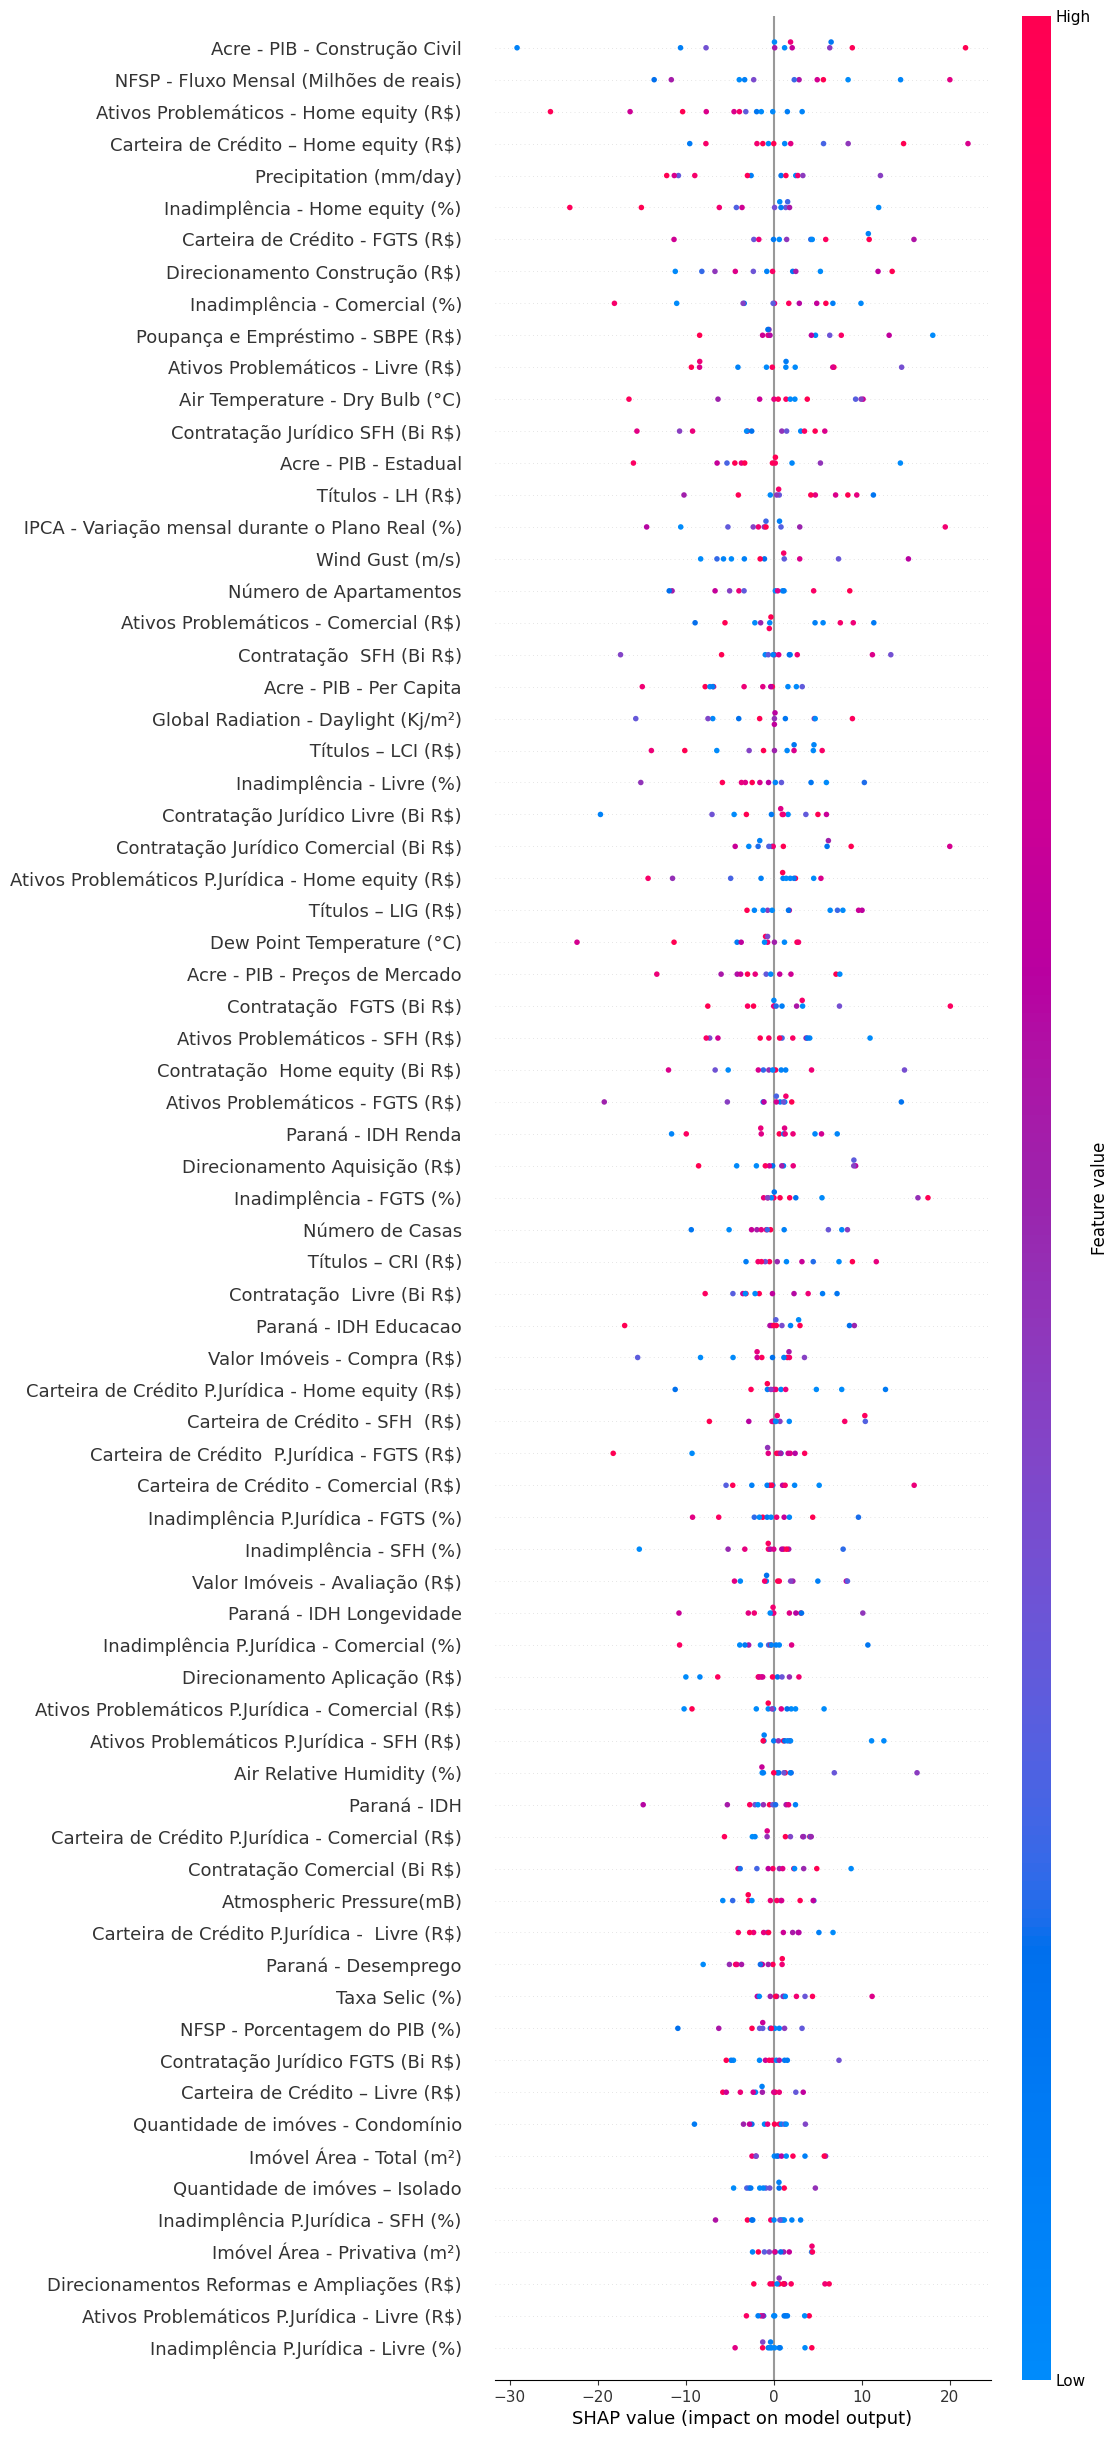

In [92]:
shap.plots.beeswarm(shap_values, max_display=73)

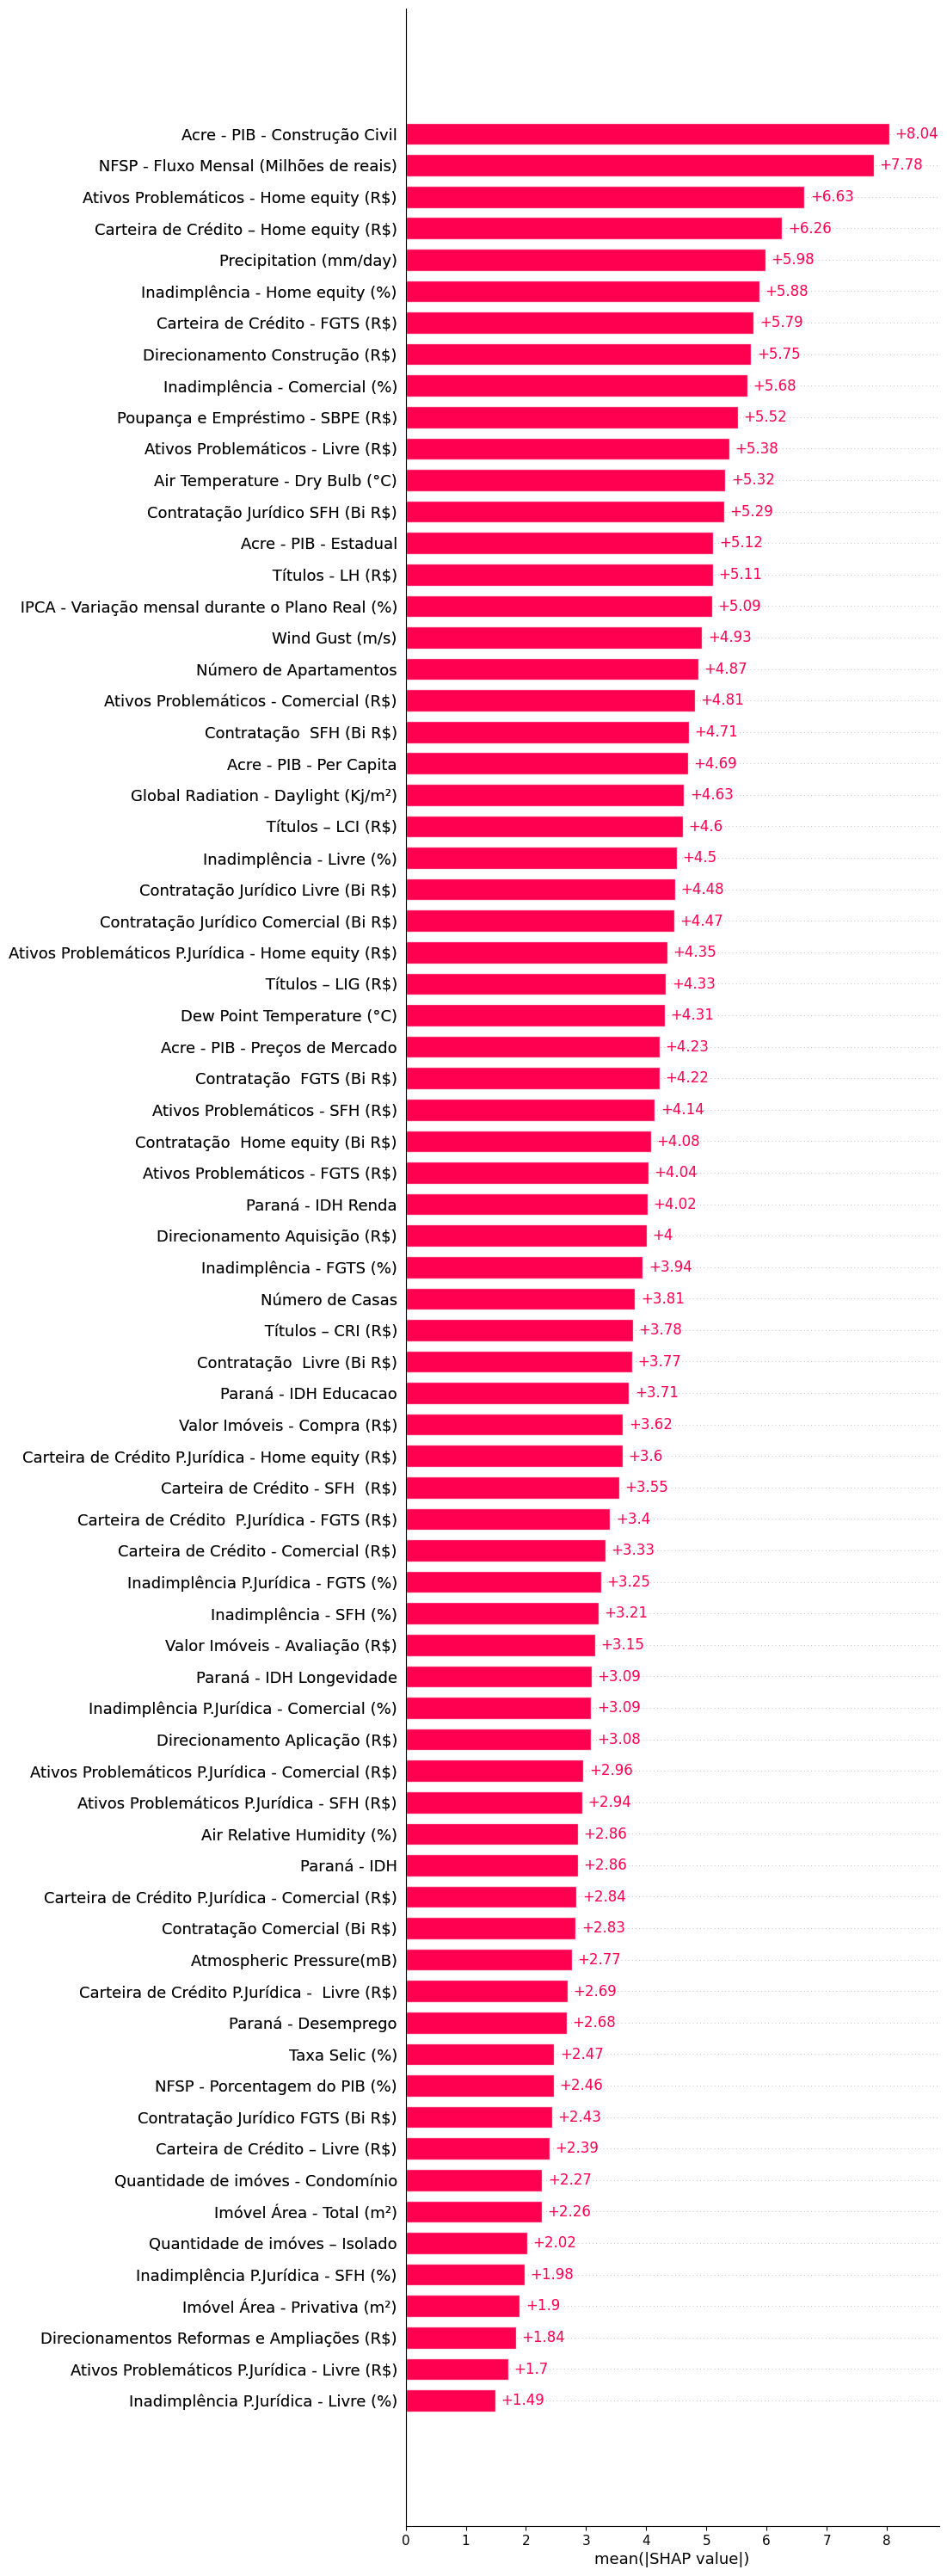

In [93]:
shap.plots.bar(shap_values, max_display=73)